In [1]:
import numpy as np
import pandas as pd
import scipy.io

import plotly.express as px
import matplotlib.pyplot as plt

xls = pd.ExcelFile('cc_spectral_signature.xlsx')
print(xls.sheet_names)

df = pd.read_excel(io='cc_spectral_signature.xlsx', sheet_name='Average Spectra')
del df['Unnamed: 0']
display(df)

df = df.apply(func=lambda e: (e - np.min(e)) / (np.max(e) - np.min(e)), axis=0)
display(df)


['Average Spectra', 'Standard dev Spectra', 'full spectra data', 'spectra plots', 'band wavelengths']


,clover,canola,triticale,vetch,soil
0,0.014240,0.020058,0.012320,0.015031,0.023255
1,0.008982,0.013230,0.007252,0.009441,0.015260
2,0.008297,0.012138,0.006968,0.008913,0.014064
3,0.007089,0.010930,0.006149,0.007877,0.012679
4,0.007600,0.011154,0.006538,0.008400,0.013057
...,...,...,...,...,...
265,0.194268,0.111603,0.111737,0.165626,0.074394
266,0.173036,0.099037,0.099370,0.147284,0.066128
267,0.149457,0.086724,0.085919,0.128095,0.057613
268,0.131905,0.076449,0.075769,0.113149,0.050504


,clover,canola,triticale,vetch,soil
0,0.037349,0.095532,0.054636,0.042584,0.178706
1,0.013874,0.038785,0.014306,0.013069,0.070831
2,0.010815,0.029714,0.012046,0.010284,0.054701
3,0.005418,0.019676,0.005525,0.004816,0.036016
4,0.007703,0.021537,0.008623,0.007577,0.041113
...,...,...,...,...,...
265,0.841132,0.856307,0.845733,0.837622,0.868717
266,0.746334,0.751884,0.747321,0.740792,0.757187
267,0.641059,0.649552,0.640286,0.639485,0.642297
268,0.562694,0.564169,0.559522,0.560582,0.546376


In [2]:
fig = px.line(data_frame=df)
fig

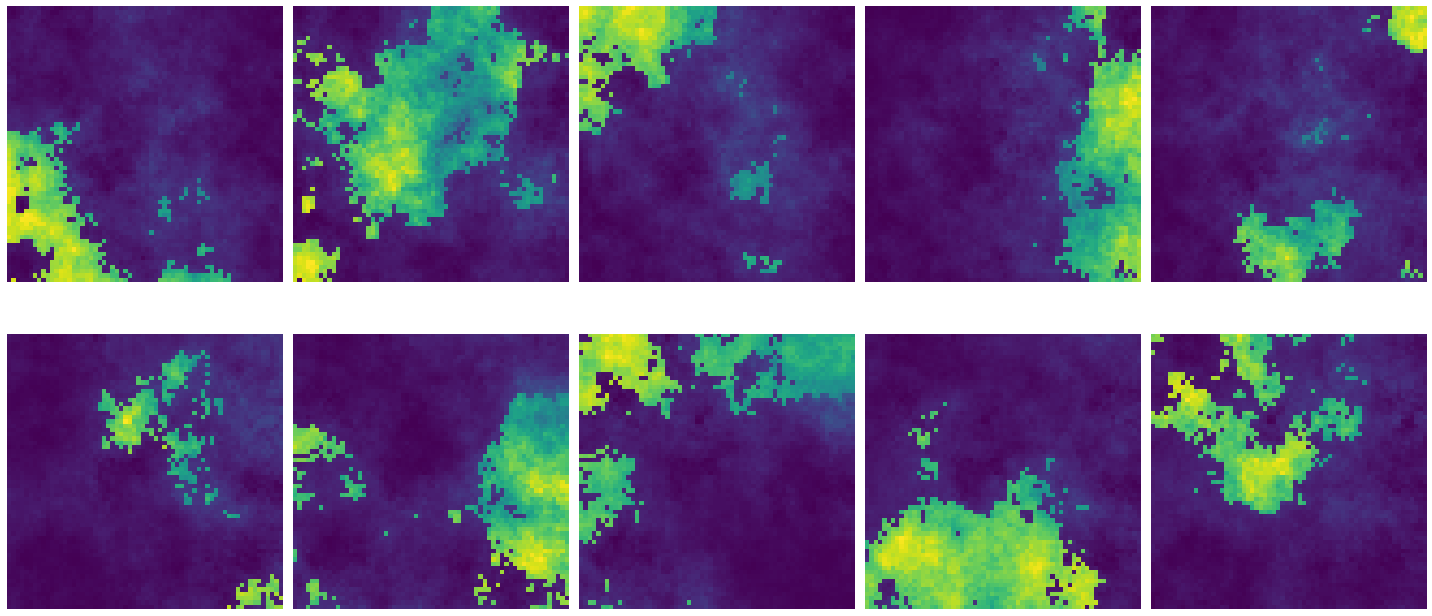

In [3]:
fig, axs = plt.subplots(2,5, figsize=(20,10))
for seq in range(0,2):    
    matfile = scipy.io.loadmat(f"abundances_gaussianfields_spheric_5em_64x64_{seq+1}")
    abundances = matfile['abundances']
    for endmember_num in range(0,5):
        axs[seq, endmember_num].imshow(abundances[...,endmember_num])        
        axs[seq, endmember_num].set_axis_off()

plt.tight_layout()
plt.show()
        




In [6]:
endmembers = df.values.T
from hsi_datasets import plot_datacube_image
from hsi_datasets import datacube_generator

results = datacube_generator(endmembers_names=list(df.columns), endmembers_spectra=endmembers, abundances_tensor=abundances)
datacube, abundances_tensor, endmembers_spectra, endmembers_names = results


outputfile = "datacube.png"
fig = plot_datacube_image(
    datacube=datacube, 
    outputfile=outputfile, 
    showfigure=True, 
    reduce_factors=(1,1,1)
)


